In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('student1.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.shape

(571, 43)

In [6]:
df.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
229,CS-97230,B-,B,C,A-,C-,A,A-,B-,B,...,C-,C,A-,C,A-,A-,B-,B+,A-,2.644
549,CS-97550,A-,C,A,A,B,B,B-,C-,B-,...,B+,B-,A,B,B-,B,B,B-,B-,2.860
28,CS-97029,B+,B,A-,B+,B-,A,B,D+,A-,...,C+,B+,B,C+,A-,A,B-,B+,A-,3.195
473,CS-97474,A-,C,A,A,B,A,B+,C,B+,...,A,C+,A,B,B,B+,B+,B,B-,3.019
465,CS-97466,A-,B,A+,A-,A,A+,B-,A,B+,...,A,B,A,A,B+,B,B+,B,B+,3.528


In [7]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Checking Null Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

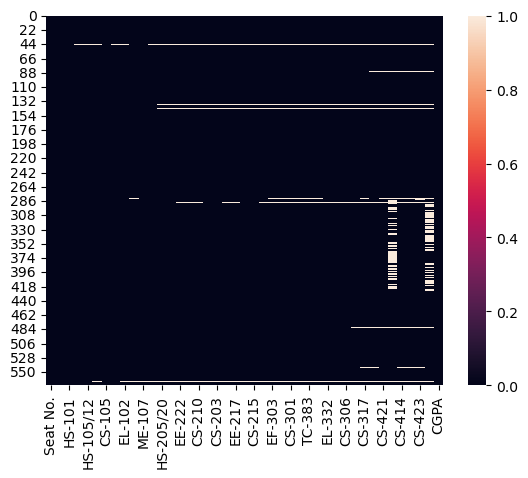

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
df.iloc[44:45,:]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493


In [13]:
df.replace(np.nan,0,inplace=True)
df.iloc[44:45,:]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,0,0,0,C-,0,0,D+,...,0,0,0,0,0,0,0,0,0,1.493


In [14]:
input=df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"],axis=1)
outcome=df["CGPA"]

In [15]:
input

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B,A-,A-,A,A+,A,A,B+,A-,A-
567,A+,A,A,A,A,A,A,A-,A,A,...,A,A,A,A,A,A,A+,A-,B+,B+
568,B,A,A-,B+,A,A,A,A,A,B,...,B,B-,B+,B+,A,B,C+,B+,A-,B
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,C,C,C+,C-,D,B-,B+,D,B


In [16]:
outcome.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [17]:
pd.unique(df['PH-121'])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [18]:
points={'B-':2.7, 'A':4, 'B-':2.7, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'W':0.2, 'WU':0.0, 'A+':4.4, 'I':0.1, 'F':0.5}

In [19]:
for i in input:
    input[i]=input[i].replace(points)
    
input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [20]:
df=pd.concat([input,outcome],axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.4,4.0,3.7,3.7,4.4,3.4,...,3.7,3.7,4.0,4.4,4.0,4.0,3.4,3.7,3.7,3.798
567,4.4,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.4,3.7,3.4,3.4,3.772
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0,3.470
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0,2.193


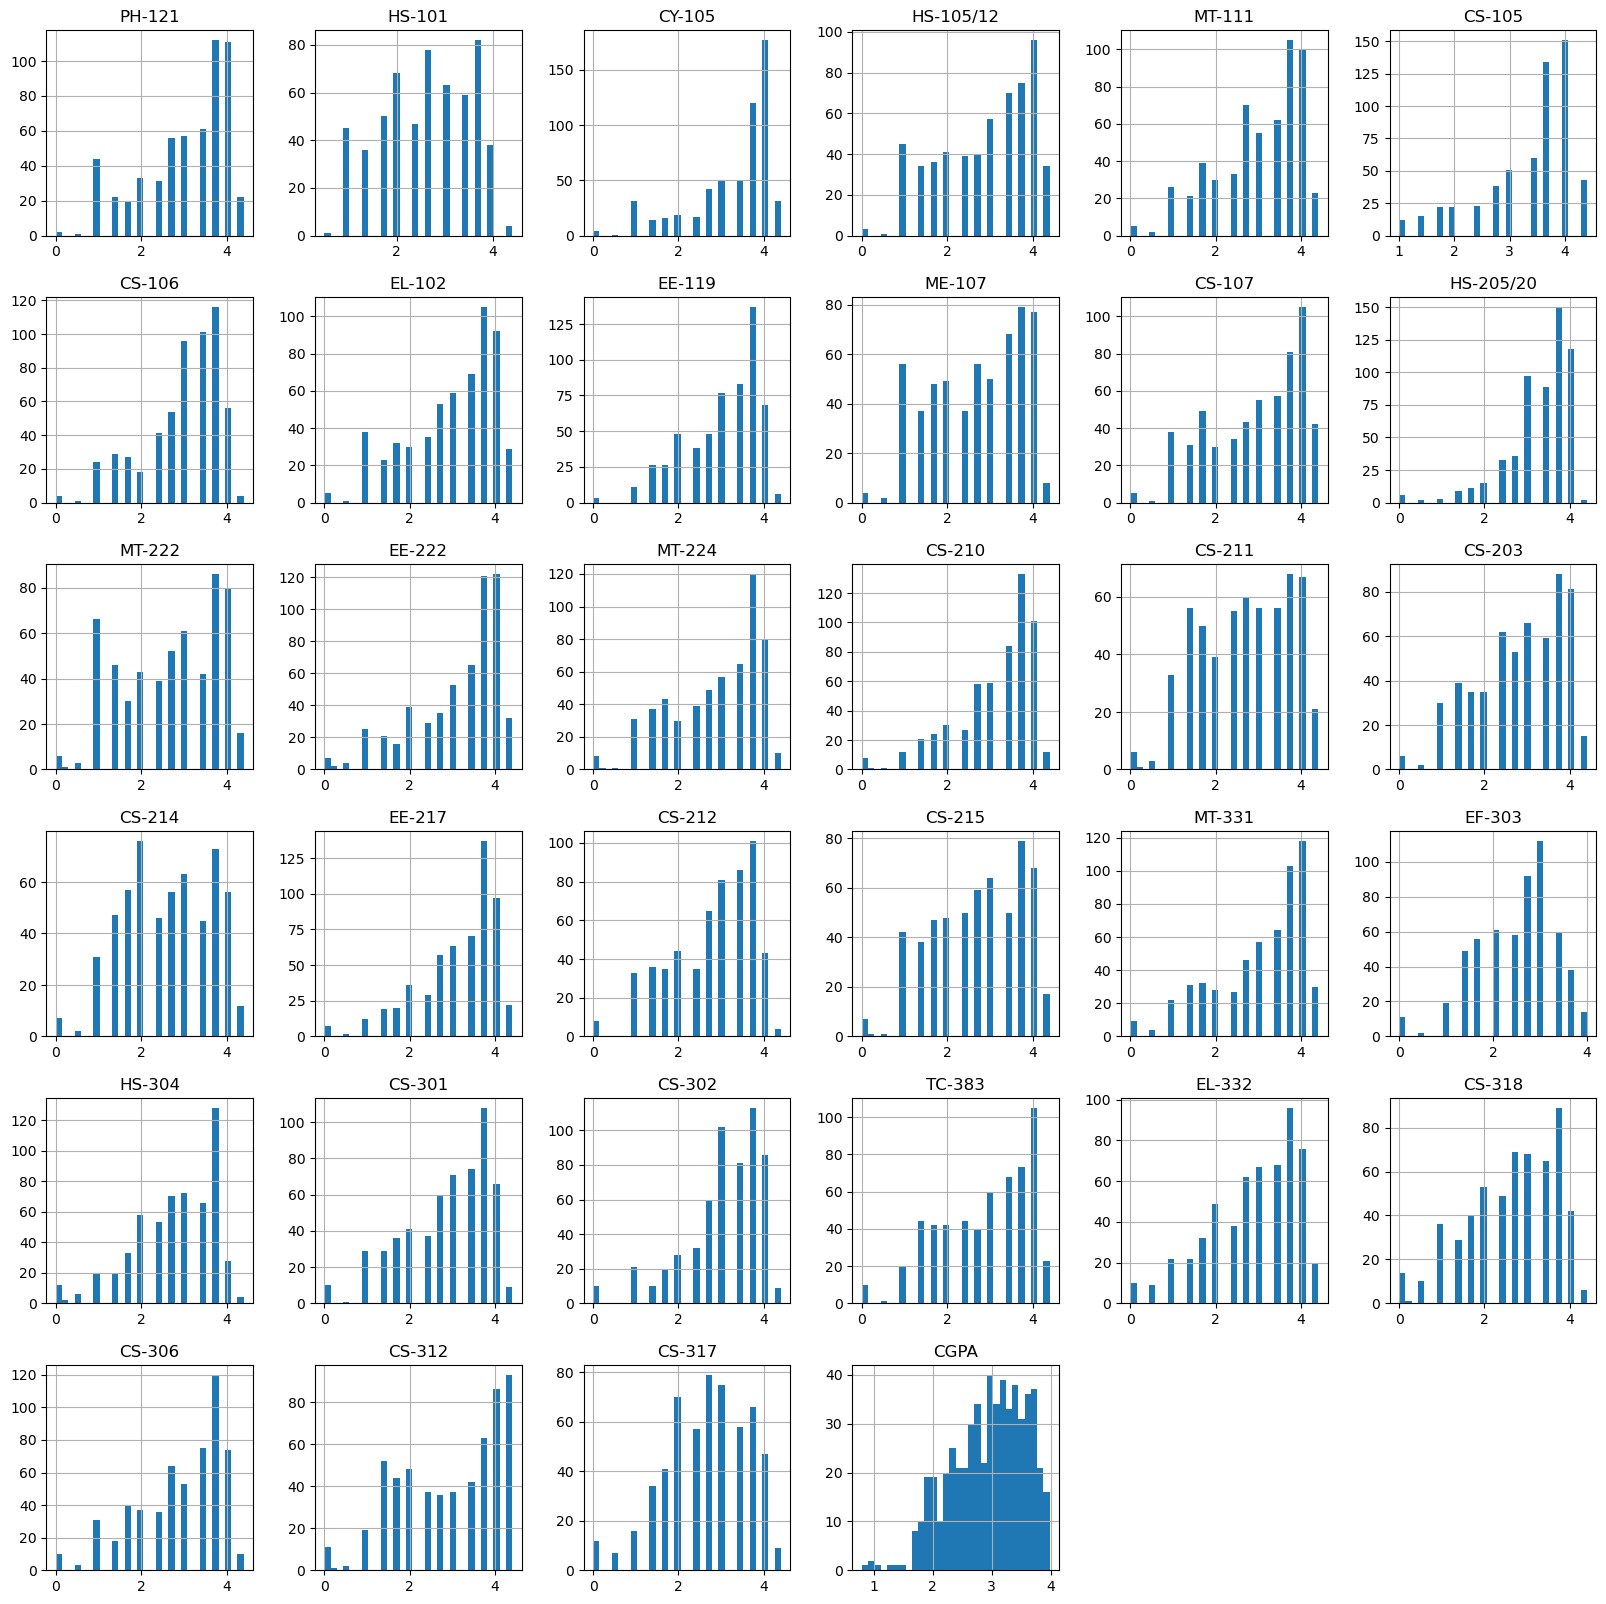

In [21]:
df.hist(bins=30,figsize=(20,20))
plt.show()


Checking Correlation

<Axes: >

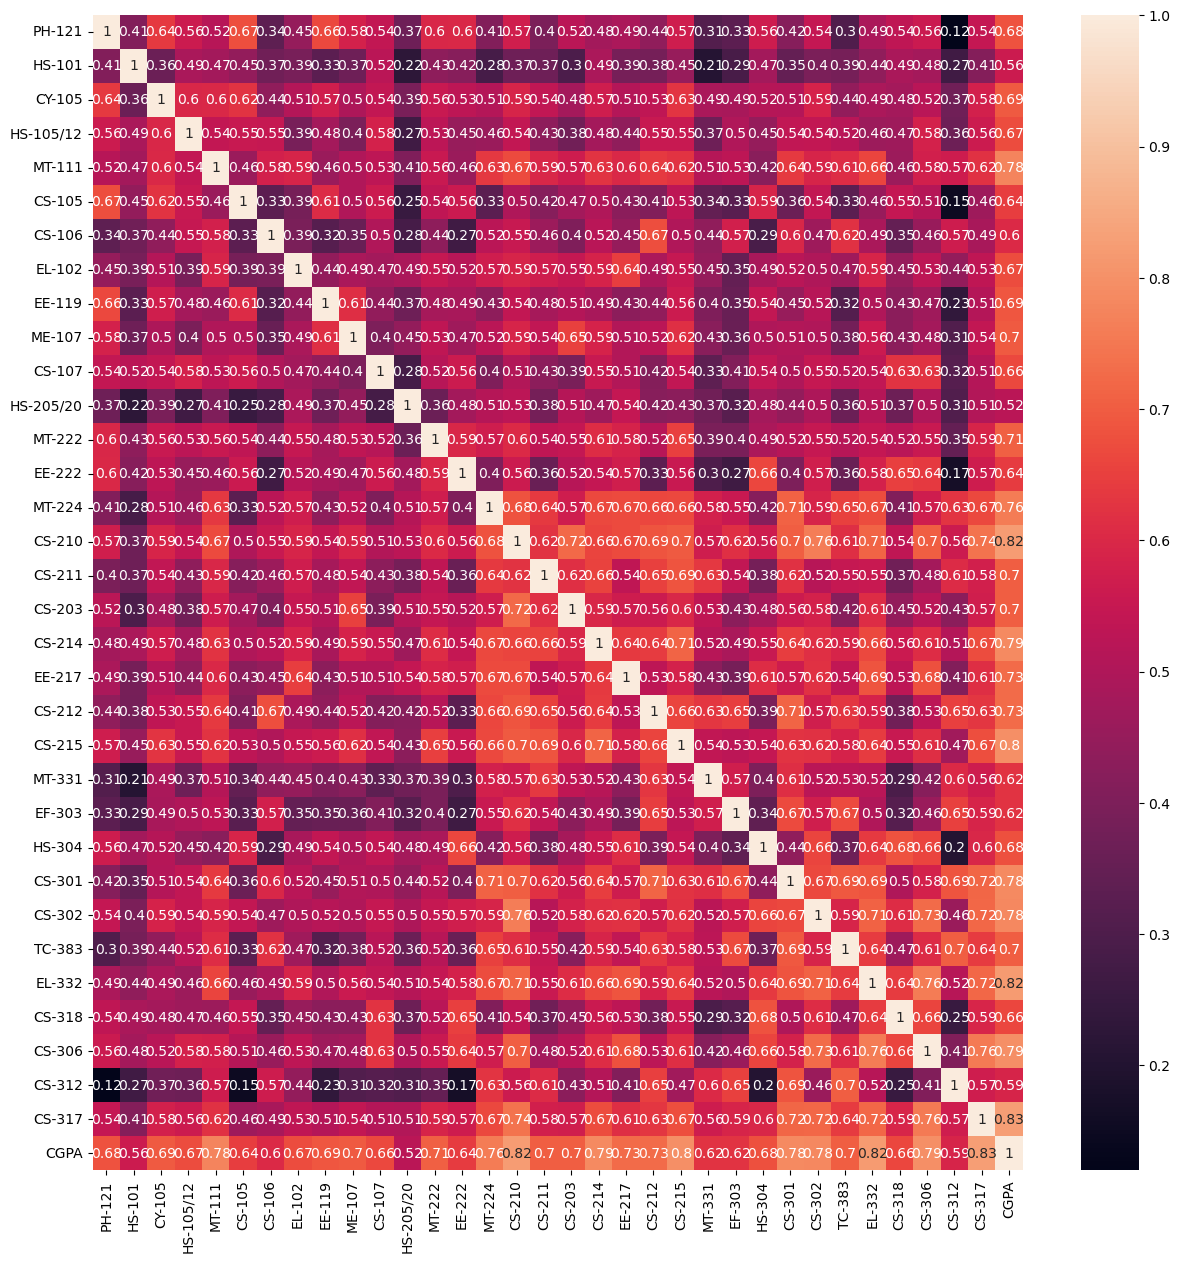

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.shape

(571, 34)

In [24]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.034676,2.632049,3.285289,2.903678,3.005954,3.359370,2.965674,2.991068,3.024343,2.705954,...,2.770403,2.857968,3.056392,2.890718,2.885639,2.641681,2.901751,2.959545,2.663573,2.954888
std,0.987602,0.910950,0.951561,1.047187,0.969518,0.831483,0.870478,1.004258,0.845350,1.033305,...,0.944039,0.976865,0.885343,1.035527,1.007483,1.020396,0.992108,1.164019,0.947149,0.620552
min,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,...,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,4.400000,3.985000


In [25]:
x=df.iloc[:,0:33]
y=df.iloc[:,33]

In [26]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.4,4.0,3.7,3.7,4.4,3.4,...,3.0,3.7,3.7,4.0,4.4,4.0,4.0,3.4,3.7,3.7
567,4.4,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.4,3.7,3.4,3.4
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0


In [27]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(456, 33)
(115, 33)
(456,)
(115,)


Implementing Machine Learning

In [30]:
new=LinearRegression()
new.fit(x_train,y_train)

LinearRegression()

In [31]:
new.coef_

array([ 0.02108604,  0.05256419, -0.00719658,  0.02073404,  0.07089284,
        0.0359178 , -0.00531419,  0.02212513,  0.1098483 ,  0.04442495,
        0.01108751, -0.04499991,  0.01662104, -0.01047844,  0.05654576,
        0.03467352, -0.00017486,  0.01417468,  0.02348712, -0.00873695,
       -0.00624478,  0.02846203,  0.01332605,  0.00501676,  0.007178  ,
        0.05839715,  0.00944298,  0.02357667,  0.04702842,  0.00119007,
        0.08965343,  0.01071765,  0.05427113])

In [32]:
new.intercept_

0.6708213073170319

In [33]:
new.score(x_test,y_test)

0.9423352489921671

In [34]:
result=new.predict(x_test)
print('Predicted Value',result)
print('Actual Value',y_test)

Predicted Value [2.07957096 3.49323452 2.84068647 2.19366531 3.76280293 3.52200299
 2.69931591 2.40926624 2.1697375  3.18927377 3.49557653 2.9432072
 3.7567622  2.74470968 3.96767672 2.54425731 2.15062828 3.58045606
 2.35840381 2.60265609 2.5135804  3.84067093 2.58808499 2.72047528
 2.93137184 3.35935355 3.36297378 2.7936894  3.40010104 3.33326735
 2.6460542  2.85484199 3.453266   3.33451561 3.72707428 3.0571601
 2.73140888 3.89424465 2.80915999 1.99276468 3.65730589 3.35365762
 3.72362649 3.62675542 3.20910918 2.43291355 2.67036024 3.0738355
 3.29384778 3.6675452  3.28123951 3.36318263 3.15689774 3.50711463
 3.3370357  3.03377485 3.77998494 3.71094432 3.70016831 2.88239207
 3.55029824 3.49721875 3.80721557 3.50599836 3.24377068 3.14338394
 3.41895444 3.30885494 2.94255089 2.34801989 3.66796455 3.21710493
 2.63806994 3.76781503 3.9804968  3.36851765 3.31492557 2.29795215
 3.80002194 2.93824752 2.55830051 2.92031765 1.41136625 2.65323688
 3.72634703 3.84689344 3.31378923 2.96969904 2.65

In [35]:
print('MSE',mean_squared_error(result,y_test))

MSE 0.019190110970531204


In [36]:
print('MAE',mean_absolute_error(result,y_test))

MAE 0.09601168219277736


In [37]:
print('RMSE',np.sqrt(mean_squared_error(result,y_test)))

RMSE 0.1385283760481267


In [38]:
print('R2 Score',r2_score(result,y_test))

R2 Score 0.9276774598215721


As per the results we get to know that the above results shows that less is the root mean squared error more good the model will predict.
So our model is good at prediction.